<a href="https://colab.research.google.com/github/toche7/AI_ITM/blob/main/Lab2MultipleRg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Multiple Linear Regression

# Lab 2: Multiple Linear Regression Analysis
## Predicting House Prices Using Multiple Features

This lab demonstrates the implementation of multiple linear regression to predict house prices based on various features. We'll cover:
1. Data Loading and Exploration
2. Data Preprocessing
3. Model Building
4. Model Evaluation and Interpretation

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## 1. Data Loading and Preprocessing
We'll use a housing dataset with multiple features to predict house prices.

In [38]:
# Create sample housing data
rng = np.random.default_rng(42)  # Create a Generator instance with seed 42
n_samples = 100

# Generate features
square_feet = rng.normal(2000, 500, n_samples)
bedrooms = rng.integers(1, 6, n_samples)
bathrooms = rng.integers(1, 4, n_samples)
age = rng.integers(0, 50, n_samples)

# Generate target (price) with some noise
price = (200 * square_feet + 50000 * bedrooms + 75000 * bathrooms - 1000 * age 
         + rng.normal(0, 50000, n_samples))

# Create DataFrame
data = pd.DataFrame({
    'SquareFeet': square_feet,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Age': age,
    'Price': price
})

print("First few rows of our dataset:")
print(data.head())

First few rows of our dataset:
    SquareFeet  Bedrooms  Bathrooms  Age          Price
0  2152.358540         3          2   24  633119.445706
1  1480.007947         2          1   25  552463.944977
2  2375.225598         4          1   21  664673.990517
3  2470.282358         5          2    7  832217.192716
4  1024.482406         2          1   46  425742.157551


## 2. Data Exploration and Visualization
Let's explore the relationships between our features and the target variable (Price).


Dataset Description:
        SquareFeet    Bedrooms   Bathrooms         Age          Price
count   100.000000  100.000000  100.000000  100.000000     100.000000
mean   1974.865194    2.870000    1.930000   24.740000  662769.061202
std     388.338609    1.330717    0.879107   15.047145  139103.667867
min    1024.482406    1.000000    1.000000    0.000000  374723.818185
25%    1728.049246    2.000000    1.000000   11.000000  570844.352647
50%    1998.923240    3.000000    2.000000   25.000000  638454.378870
75%    2267.510228    4.000000    3.000000   38.000000  764072.967826
max    3070.823800    5.000000    3.000000   48.000000  997823.175534


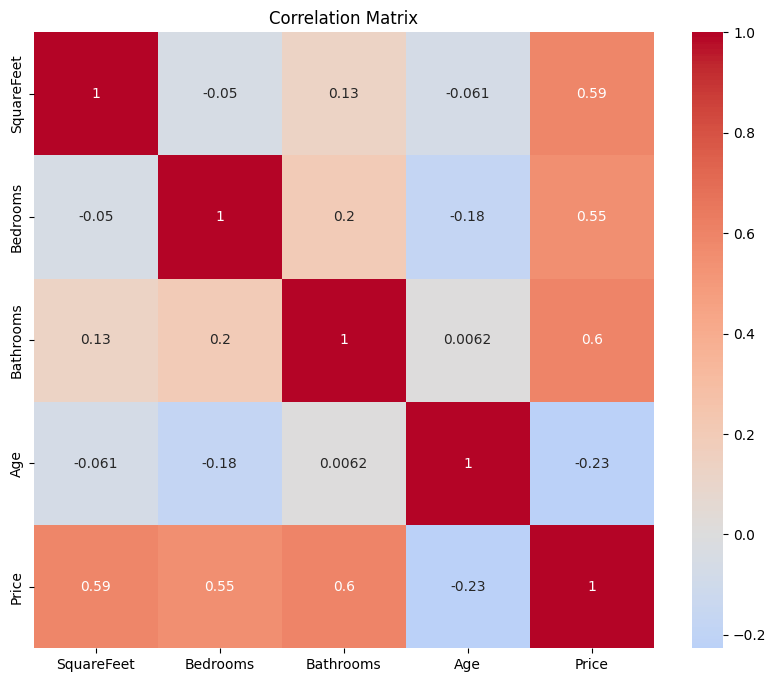

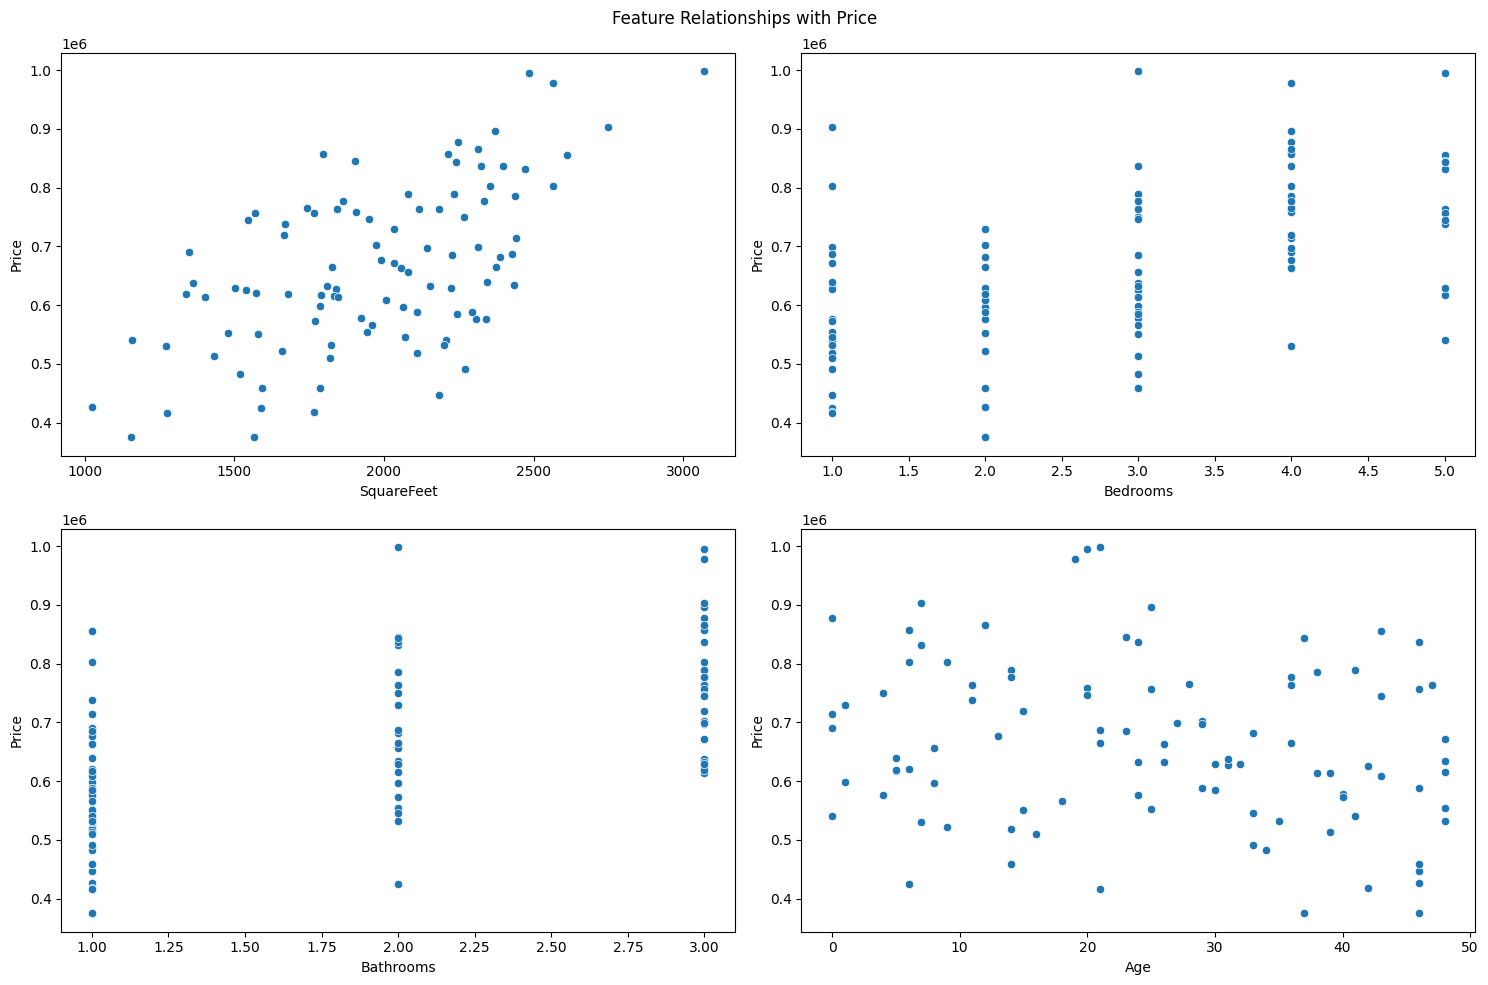

In [39]:
# Basic statistics
print("\nDataset Description:")
print(data.describe())

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Feature relationships with price
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Relationships with Price')

sns.scatterplot(data=data, x='SquareFeet', y='Price', ax=axes[0,0])
sns.scatterplot(data=data, x='Bedrooms', y='Price', ax=axes[0,1])
sns.scatterplot(data=data, x='Bathrooms', y='Price', ax=axes[1,0])
sns.scatterplot(data=data, x='Age', y='Price', ax=axes[1,1])

plt.tight_layout()
plt.show()

## 3. Data Preprocessing
We'll split our data into training and testing sets, and scale our features.

In [40]:
# Separate features and target
X = data[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Age']]
y = data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (80, 4)
Testing set shape: (20, 4)


## 4. Model Building and Training
We'll create and train our multiple linear regression model.

In [35]:
# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Print the coefficients and intercept
feature_names = X.columns
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})
print("Model Coefficients:")
print(coefficients)
print("\nIntercept:", model.intercept_)

Model Coefficients:
      Feature   Coefficient
0  SquareFeet  69937.427557
1    Bedrooms  65498.636265
2   Bathrooms  59120.183702
3         Age -19256.667764

Intercept: 654642.1688993735


## 5. Model Evaluation
Let's evaluate our model's performance using various metrics.

Model Performance Metrics:
-------------------------
Training MSE: 1,717,222,053.26
Testing MSE: 726,567,527.69
Training R²: 0.9232
Testing R²: 0.9611


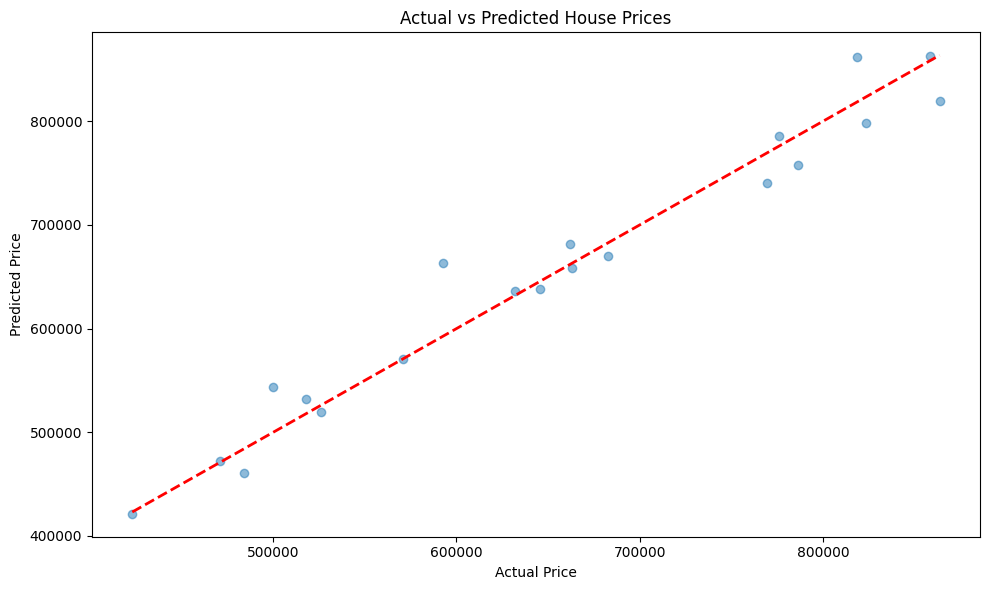

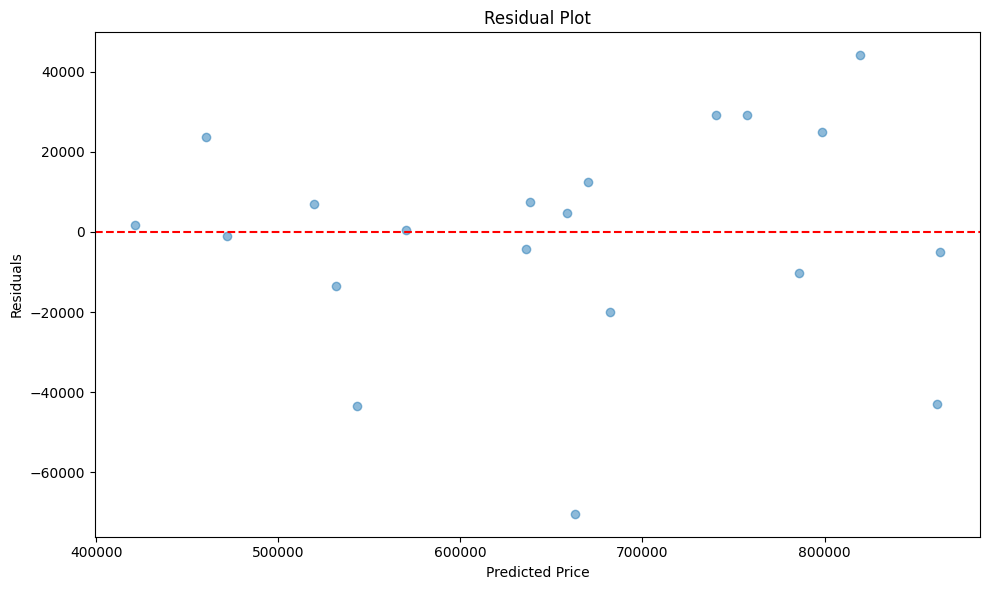

In [36]:
# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Performance Metrics:")
print("-------------------------")
print(f"Training MSE: {train_mse:,.2f}")
print(f"Testing MSE: {test_mse:,.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

## 6. Making Predictions
Let's use our model to make predictions for new houses.

In [37]:
# Example: Make predictions for new houses
new_houses = pd.DataFrame({
    'SquareFeet': [2500, 1800, 3000],
    'Bedrooms': [3, 2, 4],
    'Bathrooms': [2, 1, 3],
    'Age': [5, 15, 2]
})

# Scale the new data
new_houses_scaled = scaler.transform(new_houses)

# Make predictions
predictions = model.predict(new_houses_scaled)

# Display results
new_houses['Predicted_Price'] = predictions
print("\nPredictions for New Houses:")
print(new_houses)


Predictions for New Houses:
   SquareFeet  Bedrooms  Bathrooms  Age  Predicted_Price
0        2500         3          2    5     8.080474e+05
1        1800         2          1   15     5.222807e+05
2        3000         4          3    2     1.044758e+06


## 7. Conclusions

Our multiple linear regression model shows:
1. The R² score indicates how well our model explains the variance in house prices
2. The coefficients show the impact of each feature on the house price
3. The residual plot helps us assess if the linear regression assumptions are met

Key findings:
- Most influential features (based on coefficient magnitude)
- Model performance on test data
- Potential limitations and areas for improvement

# 8. Create a model summary

...


In [43]:
from joblib import dump, load

# After training your model (assuming your model is called 'regModel')
# Save the model
dump(regModel, 'multiple_regression_model.joblib')

# Later, when you want to load the model
loaded_model = load('multiple_regression_model.joblib')

# You can use the loaded model to make predictions
predictions = loaded_model.predict(X)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age
- Bathrooms
- Bedrooms
- SquareFeet
Feature names seen at fit time, yet now missing:
- X1
- X2
- X3
- X4
- X5
- ...
